## Data source and problem statement
**QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, you're tasked with **creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence**.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.

You're given a CSV file containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

----
## Download the data

In [1]:
from urllib.request import urlretrieve

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

urlretrieve(url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1d9ddb71120>)

In [3]:
medical = pd.read_csv('medical.csv')

medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The dataset contains information about our customers.
- age: customer's age
- sex: gender
- bmi: body mass index
- childern: number of childern they have
- smoker: whether or not he/she smokes
- region: residential region
- charges (our target variable): anual medical expenditure 

In [4]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- Our objective is to estimate or predict the charges for a new entry/ customer given other variables.
- This is a regression problem since `charges` is a continuous variable.
- The data set contains no missing values.

In [5]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The describe() method gives us an overview about this distribution and statistic about our non-catagorical variables.
As observed from the output table:
- The youngest customer is 18 years old and the oldest is 64. The average customers' age is 39. Since the mean and median is close to each other we can tell the distribution does not skew.
- The most childern a customer has is 5 kids. The average number of childern is 1.
- our target variable column charges his maximum spending of 63770 while the median is only 9382 indicating a skewed distribution.

---
## EDA and visualization

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import plotly.io as pio
import plotly.express as px
pio.renderers.default='browser'
# Some plot setting
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.facecolor'] = '#798D99'

### Age

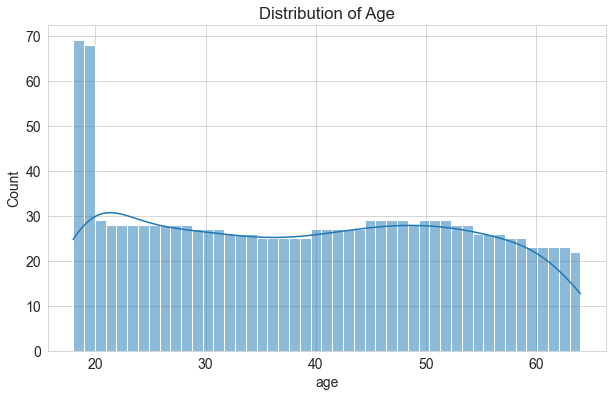

In [7]:
sns.histplot(data=medical, x='age', bins=47, kde=True)
plt.title('Distribution of Age');

The distribution of age is almost uniform. With almost round 28 observations for all age apart from 18 and 19 with up to almost 70 customers.

### Body Mass Index

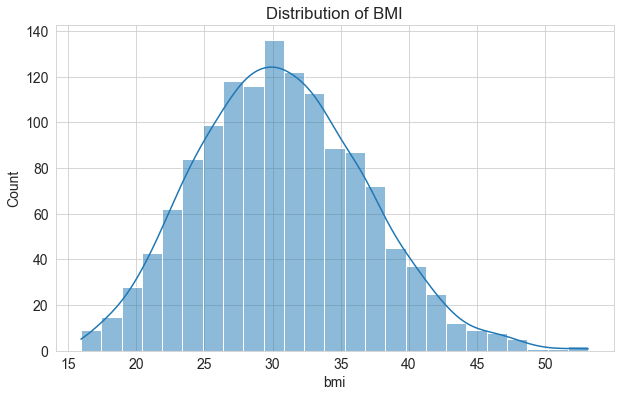

In [8]:
sns.histplot(data=medical, x='bmi', kde=True)
plt.title('Distribution of BMI');

The distribution of BMI follow a gaussian distribution. With the mean of BMI 30 we can tell that many of our customers are obesed.
### Charges

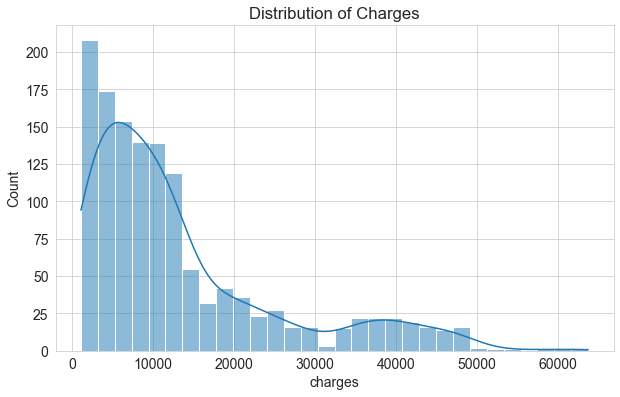

In [9]:
sns.histplot(data=medical, x='charges', kde=True)
plt.title('Distribution of Charges');

For most of our customers the annual medical charges are under $10,000. With only a small number of customers that has higher medical expenditure.

Now we know that smoking is bad for your health. Does smokers has higher medical expenditure?

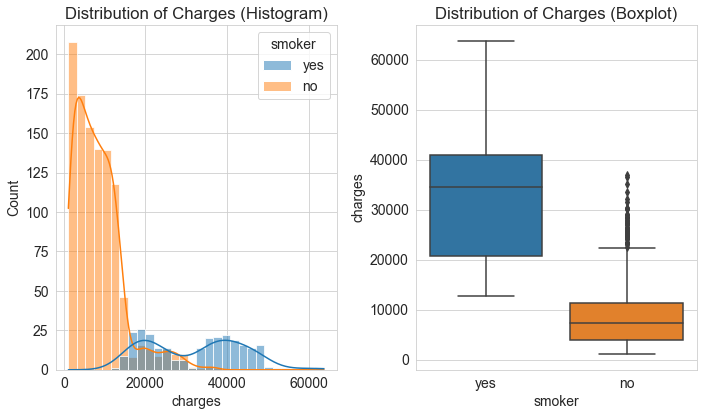

''

In [10]:
fig, axes = plt.subplots(1, 2)

sns.histplot(data=medical, x='charges', hue='smoker', ax= axes[0], kde=True)
axes[0].set_title('Distribution of Charges (Histogram)')

sns.boxplot(data=medical, y='charges', x='smoker', ax=axes[1])
axes[1].set_title('Distribution of Charges (Boxplot)')

plt.tight_layout()
plt.show()
;

From the plots above:
- There is a big difference in charges between the two classes smokers and non-smokers. 
- For non-smoker the charges are mostly below 10,000 and for smokers most of the customers spending around 20,000 to 40,000

So do we have a lot of smokers in our dataset?

In [11]:
medical['smoker'].value_counts(normalize=True)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

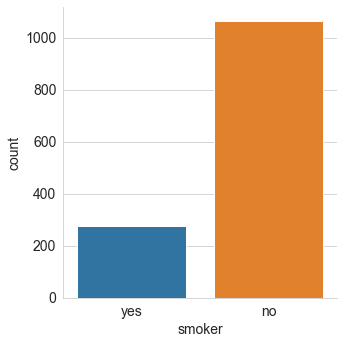

In [12]:
sns.catplot(data=medical, x='smoker', kind='count');

Luckily, only 20% of our customers are actually smokers.

Is other categorical factor associates with `charges` as well?

In [13]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


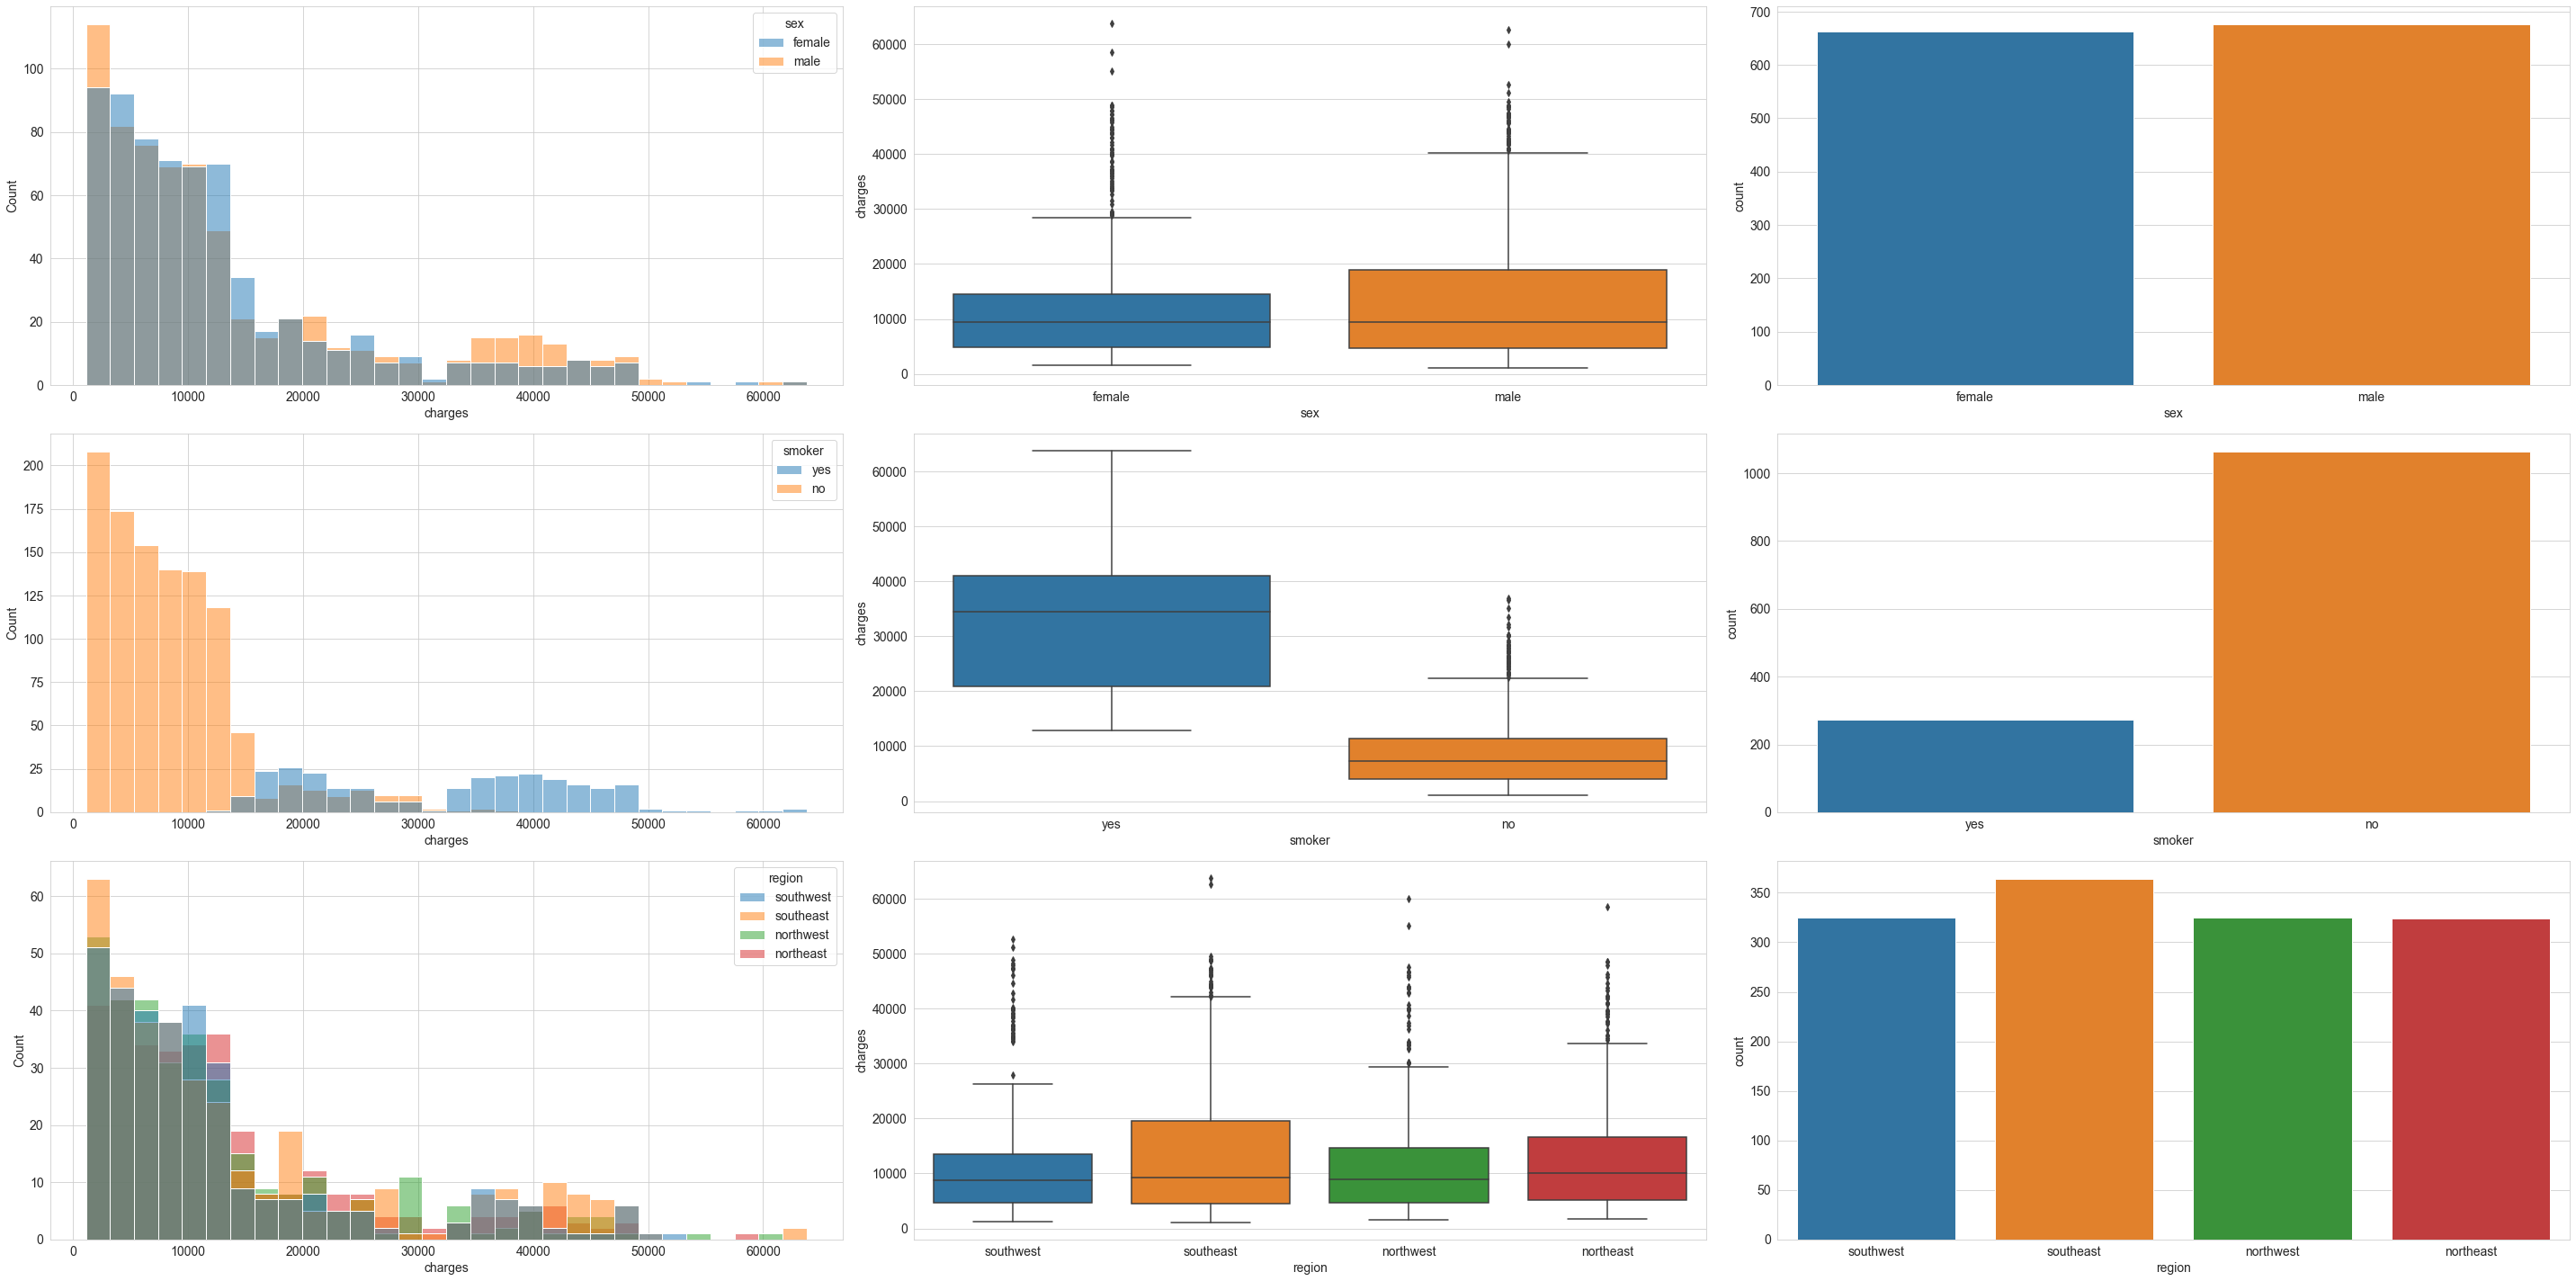

In [14]:
cat_cols = medical.select_dtypes('object').columns

fig, axes = plt.subplots(3, 3, figsize=(40,20))

num = 0
for i in range(3):
    for j in range(3):
        if j == 0:
            sns.histplot(data=medical, x='charges', hue=cat_cols[num] , ax= axes[i][j])
        elif j == 1:
            sns.boxplot(data=medical, y='charges', x=cat_cols[num], ax=axes[i][j])
        else:
            sns.countplot(data=medical, x=cat_cols[num], ax=axes[i][j])
            plt.tight_layout()
    num+=1

There is no significant differences between classes in category `sex` and `region` in ralation to `charges`. Their counts are quite similar too.

### Relationship between countinuous variables
#### BMI vs Charges

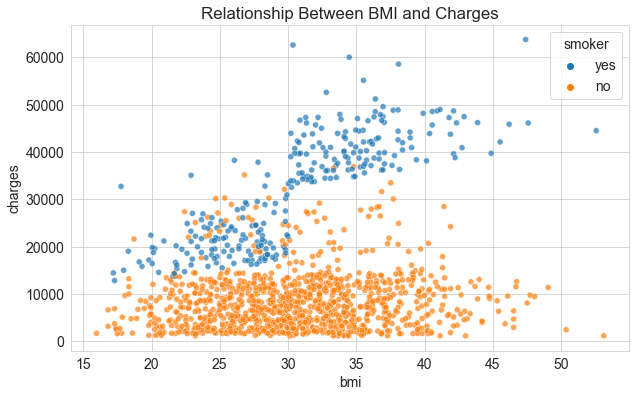

In [15]:
sns.scatterplot(data=medical, x='bmi', y='charges', hue='smoker', alpha=0.7)
plt.title('Relationship Between BMI and Charges');

Observations:
- There are two different trends between smoker and non-smoker.
- A postive relationship ship is presented by smoker. As bmi goes up the charges tends to increase as well.
- While for non-smokers. It seems like charges is almost constant across bmi.

#### Age vs Charges

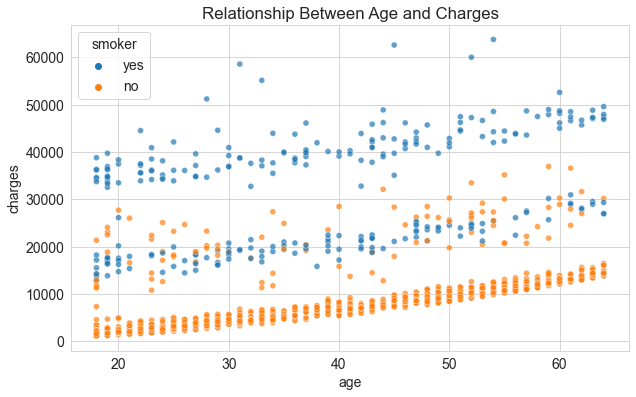

In [16]:
sns.scatterplot(data=medical, x='age', y='charges', hue='smoker', alpha=0.7)
plt.title('Relationship Between Age and Charges');

Observations:
- There are almost three distinct group: lowest - non-smokers, medium - mixed, high - smokers.
- As expected, when age increases the medical spending also increases.

#### Children

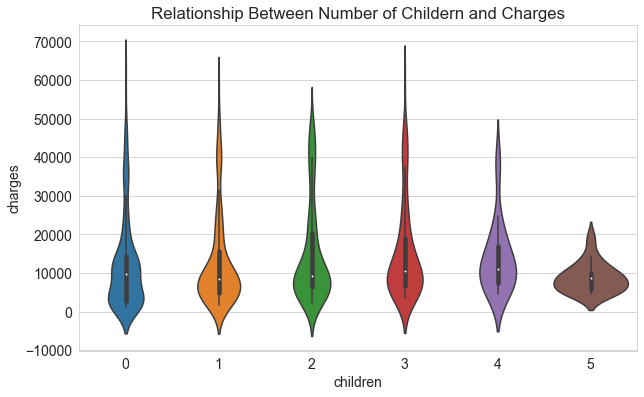

In [17]:
sns.violinplot(data=medical, y='charges', x='children', alpha=0.7)
plt.title('Relationship Between Number of Childern and Charges');

- No significant difference across customers with different number of childrens to their charges.
- Notice customers with 4 or most noticibly 5 childern have shorter `charges` range.

### Correlation

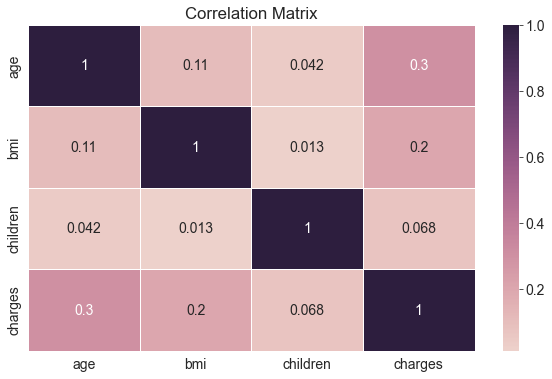

In [18]:
sns.heatmap(data=medical.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5)
plt.title('Correlation Matrix');

`charges` and `age` has the highest correlation of 0.3

---
### Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, PredictionErrorDisplay

#### Pre-procesing data

In [20]:
# Encoding categorical variables
smoker_code = {'yes': 1, 'no': 0}
medical['smoker_code'] = medical['smoker'].map(smoker_code)

gender_code = {'female': 0, 'male': 1}
medical['sex_code'] = medical['sex'].map(gender_code)

In [21]:
encoder = OneHotEncoder()
coded_array = encoder.fit_transform(medical[['region']]).toarray()
coded_array

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [22]:
medical[['northeast', 'northwest', 'southeast', 'southwest']] = coded_array
medical.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


So now all the categorical variables have been coded to numerical.

In [23]:
# Feature scaling
num_cols = list(medical.iloc[:,:6].select_dtypes(['int', 'float']).columns) # numerical column names

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(medical[num_cols]), 
                         columns= [x+'_scaled' for x in num_cols]) # scaled numerical cols

scaled_df

,age_scaled,bmi_scaled,children_scaled
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [24]:
df = pd.concat([scaled_df, medical.iloc[:,6:]], axis=1)
df['charges'] = df.pop('charges') # move charges to the last column for convience
df.head()

,age_scaled,bmi_scaled,children_scaled,smoker_code,sex_code,northeast,northwest,southeast,southwest,charges
0,-1.438764,-0.453320,-0.908614,1,0,0.0,0.0,0.0,1.0,16884.92400
1,-1.509965,0.509621,-0.078767,0,1,0.0,0.0,1.0,0.0,1725.55230
2,-0.797954,0.383307,1.580926,0,1,0.0,0.0,1.0,0.0,4449.46200
3,-0.441948,-1.305531,-0.908614,0,1,0.0,1.0,0.0,0.0,21984.47061
4,-0.513149,-0.292556,-0.908614,0,1,0.0,1.0,0.0,0.0,3866.85520


Now we have everything nice and tidy. We can start answering some questions!

#### What are the most important features?

We can do so by fitting a linear model then assess its coeficients

In [25]:
X = df.drop(['charges'], axis=1)
y = df['charges']

# fit a linear model
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [26]:
X.values

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [27]:
weighted_feature_df = pd.DataFrame({'feature':np.append(X.columns, 1),
              'weight':np.append(lm.coef_, lm.intercept_)})
weighted_feature_df.sort_values('weight', ascending=False)

,feature,weight
5,northeast,1.758467e+17
6,northwest,1.758467e+17
7,southeast,1.758467e+17
8,southwest,1.758467e+17
3,smoker_code,2.385276e+04
0,age_scaled,3.608872e+03
1,bmi_scaled,2.058490e+03
2,children_scaled,5.615551e+02
4,sex_code,-1.670010e+02
9,1,-1.758467e+17


---
### Test Data and Model Perfomance

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=113)

X_train.shape, X_test.shape

((1070, 9), (268, 9))

In [37]:
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [43]:
print('MAE:', mean_absolute_error(y_pred, y_test))
print('R-squared:', r2_score(y_pred, y_test))

MAE: 4055.2304565006407
R-squared: 0.6781203350070759


- 67% in the target variance is explained by the features of our model.
- On average the prediction of our model is off by 4055 dollars from the true value.

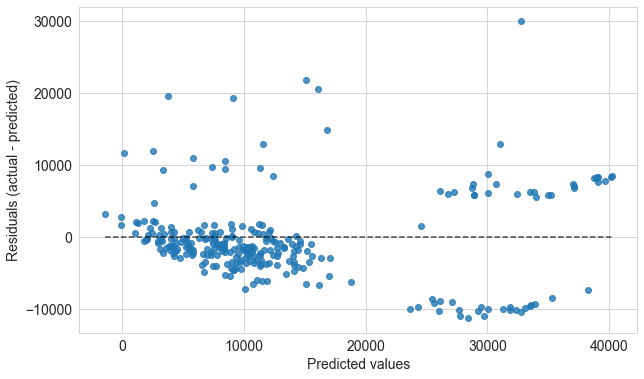

In [48]:
PredictionErrorDisplay(y_pred=y_pred, y_true=y_test).plot();

Our model is doing very well predicting values under 20,000. However, we can see larger deviation or error for values greater than 20,000. 